In [20]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


from langchain_mistralai import ChatMistralAI  # Import Mistral integration
from dotenv import load_dotenv

import pandas as pd

In [8]:
import getpass
import os

root_path = os.getcwd()
print(root_path)

/Users/nursulusagimbayeva/Downloads/ai_powered_client_maintanence/ai_powered_client_maintanence


Load the LLM

In [ ]:
# Load environment variables from .env file
load_dotenv()

True

In [9]:
os.environ["MISTRAL_API_KEY"] = os.getenv('MISTRAL_API_KEY')

In [14]:
# Instantiate the Mistral LLM
llm = ChatMistralAI(
    model="mistral-large-latest",  # Replace with your desired Mistral model
    temperature=0.7,
    max_retries=3,
)

In [ ]:
# Graph state
class State(TypedDict):
    negotiation_msg: str
    joke: str
    improved_joke: str
    send_confirmation_email: str
    start_negotiation: str
    
    
clients_temp = dict()

TODO: add calendly invite to the user email

TODO: emergency scale

In [21]:
data = pd.read_csv("data/client_requests.csv")

In [31]:
data.iloc[-1]

Emergency                           no
Client ID                     446838e0
Customer                           yes
Client email       pmorris@example.net
Product                              3
Date of request             2025-02-27
Name: 99, dtype: object

In [ ]:
# Nodes
# def get_product_request(state: State):
    

def check_inventory(state: State):
    """Check if there is inventory in stock"""
    
    ### TODO: replace with the access to the database
    data = pd.read_csv("data/client_requests.csv")
    product_id = data.iloc[-1]['Product']
    
    df_product_vendor = vendors[vendors['Product ID'] == product_id]
    if df_product_vendor['inventory'] > 5: 
        return {"send_confirmation_email": True, "start_negotiation": False}
    elif 5 >= df_product_vendor['inventory'] > 0: 
        return {"send_confirmation_email": True, "start_negotiation": True}
    
    ### TODO: Make it recursive/ more beautiful
    else:
        # if the replacement is available, but the current product is out of stock -> start negotiation for current product_ID 
        # TODO: might need to negotiation for several missing/deficite products
        if str(vendors[vendors["Product ID"] == int(df_product_vendor['Replacement'])]) == 'nan': 
            return {"send_confirmation_email": False, "start_negotiation": True}
        else: 
            return {"send_confirmation_email": True, "start_negotiation": True}


# Nodes
def generate_email_client(state: State):
    """Write an email to the client confirming the order and secifying the expected time"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

### TODO: Create a separate CSV - temporary
### Add a column - Solved/Unsolved
def start_negotiation(state: State):
    '''
    
    '''
    # Aggregate for the temporary table
    # Unsolved - aggregate based on each product 
    # Get urgency
    # Volume
    
    # input: urgency, volume, rest 
    # TODO: think of more factors to include
    # TODO: next step = Weights - input from the manager 
    # What criteria we need to stop the negotiation?
    # 
    # TODO: next step = several decision participants 
    # 
    msg = llm.invoke(f"#TODO: write a prompt {state['negotiation_msg']}")
    # TODO: gmail
    # Output: 
    # offer. 
    # keep negotiating
    # Reject - stop negotiation.
    # human in the loop - human receives a notification - negotiate again.
    # if vendor accepted our offer -> update stock; send email to the user (if required);  track our profits 
    # TODO: separate CSV file with our deals. 
    OUTPUT: decision_company, content_negotiation_company

def parse_numbers:
    ''' parse offer and return offer '''

def response_vendor(state: State):
    '''
    if company Accepts an offer -> stop/confirm
    if company keeps negotiation -> bargain/ reject
    if company rejects -> deal closed  
    '''
    OUTPUT: decision_vendor, content_negotiation_vendor
    
    
    
    
    
    
    
    
    
    

IndentationError: expected an indented block after function definition on line 2 (4209241196.py, line 5)

Workflow

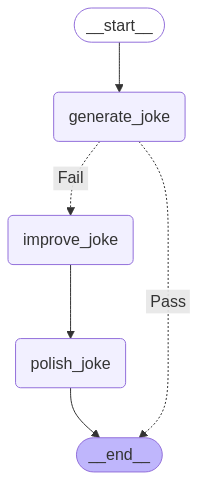

Initial joke:
What do you call a cat that lives in an igloo? An eskimew.

--- --- ---

Improved joke:
What do you call a cat that lives in an igloo? A purr-mafrost eskimew!

--- --- ---

Final joke:
What do you call a cat that lives in an igloo? A purr-mafrost eskimew! And what do you call it when it starts singing? A mew-sical ice-olation!


In [18]:
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Fail"
    return "Pass"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "cats"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Joke failed quality gate - no punchline detected!")